# Imports

In [ ]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import shutil

from copy import deepcopy
from statistics import stdev

# Golbal Variables

In [ ]:
data_dir = "/content/drive/MyDrive/Classes/CSCE 6810 Advanced Topics in Computational Life Science/Group Project/Dataset/"
prep_dir = data_dir + "Preprocessed/"
multi_dir = prep_dir + "Multi Cell/data/"
single_dir = prep_dir + "Single Cell/"
unbatched_dir = data_dir + "Model Ready/Single Cell/Unbatched/"
batched_dir = data_dir + "Model Ready/Single Cell/Batched/"

# Data Analysis

In [ ]:
def get_counts(df):
    df_new = df.replace(0.0, np.nan, inplace=False)
    non_0_counts = []
    for i, row in df_new.iterrows():
        non_0_counts.append(row.count())
    non_0_counts = sorted(non_0_counts)

    min = non_0_counts[0]
    max = non_0_counts[-1]
    avg = sum(non_0_counts)/len(non_0_counts)

    plt.plot(non_0_counts)
    plt.show()

    return non_0_counts, min, max, avg, len(non_0_counts)

In [ ]:
non_0_counts_master = []

# Analyze File

In [ ]:
f_name = "GSE146026_norm.csv"
df = pd.read_csv(single_dir + f_name)
df

,10x-1,10x-2,10x-3,10x-4,10x-5,10x-6,10x-7,10x-8,10x-9,10x-10,...,10x-9600,10x-9601,10x-9602,10x-9603,10x-9604,10x-9605,10x-9606,10x-9607,10x-9608,10x-9609
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,4.335762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,2.646804,0.000000,2.476085,3.690924,3.657840,3.456445,3.275640,3.677888,0.000000,3.399963
3,0.000000,0.000000,0.0,1.689331,1.781851,0.000000,0.0000,0.000000,0.000000,2.027488,...,1.833883,1.959282,1.949495,1.623675,1.193723,1.570816,1.702717,1.872770,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,3.081016,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.386899,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,0.842742,0.641318,0.0,0.692451,0.848309,0.802309,0.8054,0.743388,0.785538,0.712621,...,0.686273,0.763552,0.643430,0.630916,0.329610,0.717845,0.760448,0.806870,0.732143,0.727763
11544,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11545,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.423156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11546,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,3.422872,2.334296,0.000000,0.000000,0.000000,0.000000,2.874881,0.000000,0.000000


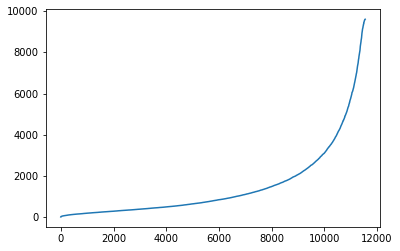

In [ ]:
non_0_counts, min, max, avg, l = get_counts(df)
non_0_counts_master.append(non_0_counts)

In [ ]:
print(min, max, avg, l)

12 9608 1503.4844994804296 11548


In [ ]:
len(df)

11548

# Break into Sequences

In [ ]:
seqs = []
for i, row in df.iterrows():
    if i % 500 == 0:
        print(i)
    s = row.values

    # Strip 0 values
    s = [x for x in s if x > 0]

    # Pad
    while len(s) < 8000:
        s = s + [0.0] + s

    # Break up
    while len(s) > 200:
        seqs.append(s[:200])
        s = s[200:]

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500


In [ ]:
# Attach label
for i, row in enumerate(seqs):
    seqs[i].append("GSE146026_norm")

In [ ]:
# Convert to dataframe
df = pd.DataFrame(seqs)
cols = list(df.columns)
cols[-1] = "label"
df.columns = cols

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,3.717377,3.583996,3.559539,3.484977,3.577343,3.260514,3.547046,3.475580,3.595280,3.562040,...,3.219719,3.570480,3.432506,3.403933,3.234892,3.194750,3.346299,3.409934,3.540650,GSE146026_norm
1,3.218466,3.535415,3.482672,3.349874,3.323704,3.655361,3.484844,3.544258,3.462949,3.549699,...,3.585376,3.303510,3.462886,3.528548,3.280228,3.532788,3.445045,3.450461,3.575741,GSE146026_norm
2,3.298821,3.419266,3.574733,3.700863,3.488559,3.714233,3.445284,3.118093,3.571476,3.273080,...,3.590513,3.653298,2.995693,3.199653,3.594659,3.495553,3.587109,3.565213,3.553674,GSE146026_norm
3,3.308160,3.438345,3.362838,3.397002,2.953823,2.989296,3.449977,3.505031,3.083687,3.353815,...,3.359794,3.533986,3.102754,3.658131,3.160733,3.263963,2.979958,3.535717,3.592888,GSE146026_norm
4,3.594836,3.551819,3.411420,3.419379,3.480707,3.178736,3.413077,3.394187,3.277315,3.554824,...,3.487893,3.260080,3.074546,2.721016,3.180383,2.701448,3.051237,2.886136,3.470199,GSE146026_norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660305,2.770737,3.102513,2.477022,3.087941,2.577832,3.337551,3.618911,2.691718,2.851316,3.362389,...,3.421036,3.225016,3.257395,2.955219,3.282316,3.322340,3.038533,2.814515,3.202849,GSE146026_norm
660306,3.159800,3.184482,3.364090,2.838123,3.115121,2.822369,3.130144,2.821416,3.441776,3.270120,...,3.346252,3.418722,3.210368,2.951011,3.203374,3.251829,3.407523,2.949846,3.408055,GSE146026_norm
660307,3.390624,3.229589,3.236953,2.878760,3.223371,3.393013,2.817539,2.975812,2.687327,2.935688,...,2.525405,2.459536,2.582847,3.141910,3.103207,2.412414,3.151031,3.047722,3.284884,GSE146026_norm
660308,2.992804,2.458308,3.470730,2.319676,2.837458,2.930250,3.189604,3.139986,2.786407,2.732274,...,2.073881,3.179806,1.908692,2.661581,2.442949,2.577410,3.224506,2.682025,2.592981,GSE146026_norm


# Save to File

In [ ]:
# Save to file
df.to_csv(unbatched_dir + "GSE146026_norm.csv", index=False)

# Pre-Batch

In [ ]:
random.seed(42)

In [ ]:
seqs_copy = deepcopy(seqs)
random.shuffle(seqs_copy)

In [ ]:
c = 0
while len(seqs_copy) > 64:
    if c % 100 == 0:
        print(c)
    tmp = seqs_copy[:64]
    seqs_copy = seqs_copy[64:]
    df = pd.DataFrame(tmp, columns=cols)
    df.to_csv(batched_dir + "batch_%d.csv"%(c), index=False)
    c += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
